## SPOILERS
- Build model to calssify images
- use torchvision to apply transformations to images
- compose transformations and apply them to datasets
- perform data augmentation in the training set
- use samplers to handle imbalanced datasets
- understand why we need activation functions
- build a deeper model using activation functions

## Imports

In [12]:

import random
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader, random_split,\
                             WeightedRandomSampler, SubsetRandomSampler
from torchvision.transforms import Compose, ToTensor, Normalize,\
                                    ToPILImage, RandomHorizontalFlip, Resize

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from pathlib import Path
import sys
path_src = str(Path().resolve().parents[0])
sys.path.append(path_src)
from stepbystep.v0 import StepByStep
from plots.chapter4 import *
from data_generation.image_classification import generate_dataset

## Classifying Images

#### Data Generation
- Line not Diagonal: class Negative - value 0
- Line Diagonal: class Positive - value 1

In [13]:
images, labels = generate_dataset(
    img_size=5,
    n_images=300,
    binary=True,
    seed=13
)

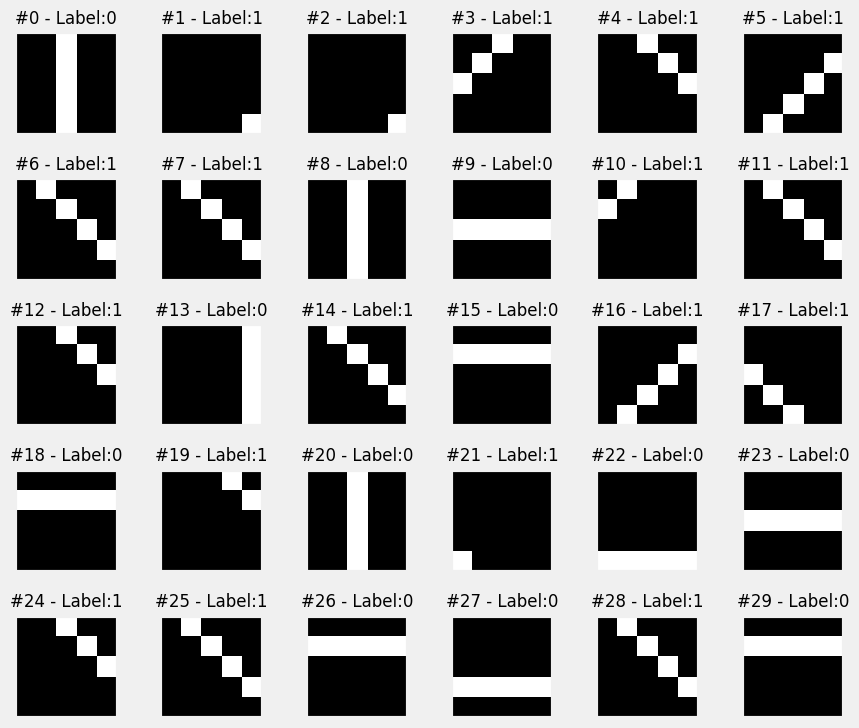

In [14]:
fig = plot_images(images, labels, n_plot=30)

#### Images and Channels

- grayscale image has only one channel, value range from zero (black) to 255 (white).
- colored images have three channels, each channel represents the intensity of red, green, and blue respectively.

#### Shape (NCHW vs NHWC)

- N: Number of image (in a mini-batch for example)
- C: Number of channels or filters in each image
- H: Height of each image
- W: Width of each image

Convetion:
- PyTorch use: NCHW
- Tensorflow use: NHWC

-> In this case, we use NCHW arccording to PyTorch

In [15]:
images.shape

(300, 1, 5, 5)

In [16]:
images[0]

array([[[  0,   0, 255,   0,   0],
        [  0,   0, 255,   0,   0],
        [  0,   0, 255,   0,   0],
        [  0,   0, 255,   0,   0],
        [  0,   0, 255,   0,   0]]], dtype=uint8)

In [17]:
# Transpose dimensions of image array
image = np.transpose(images[0], (1,2,0))

In [18]:
images.shape

(300, 1, 5, 5)

In [19]:
images[0]

array([[[  0,   0, 255,   0,   0],
        [  0,   0, 255,   0,   0],
        [  0,   0, 255,   0,   0],
        [  0,   0, 255,   0,   0],
        [  0,   0, 255,   0,   0]]], dtype=uint8)

-> HWC format is surely not intuitive to look at arraystyle!

## Torchvision

Torchvision is a package containing popular datasets, model architectures, and
common image transformations for computer vision.

#### Transforms

In [20]:
tensorize = ToTensor()
example_tensor = tensorize(image)
example_tensor.shape

torch.Size([1, 5, 5])

In [21]:
torch.transpose(example_tensor, 1, 0)

tensor([[[0., 0., 1., 0., 0.]],

        [[0., 0., 1., 0., 0.]],

        [[0., 0., 1., 0., 0.]],

        [[0., 0., 1., 0., 0.]],

        [[0., 0., 1., 0., 0.]]])

-> ToTensor() scale values from 0-255 to 0-1

#### Transforms on Images